# EPC REDES DE KOHONEN

In [1]:
import math 
from tqdm.notebook import tqdm 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

#PREPARA DADOS - REFERENCIA https://www.inblog.in/Self-Organising-Maps-From-Scratch-7dSqjEKy9h

In [78]:
#Importando os dados
dados=pd.read_excel('dados_EPC09.xls')    

In [79]:
#Visualiando os 10 primeiros dados
dados.head(10)

,x1,x2,x3,TIPO
0,0.2417,0.2857,0.2397,A
1,0.2268,0.2874,0.2153,A
2,0.1975,0.3315,0.1965,A
3,0.3414,0.3166,0.1074,A
4,0.2587,0.1918,0.2634,A
5,0.2455,0.2075,0.1344,A
6,0.3163,0.1679,0.1725,A
7,0.2704,0.2605,0.1411,A
8,0.1871,0.2965,0.1231,A
9,0.3474,0.2715,0.1958,A


In [80]:
dados_input= dados.drop(["TIPO"], axis=1)  #TIRA CATEGORIA
valoresEntrada=np.array(dados_input) #PASSA PARA MATRIZ NP ARRAY
valoresEntrada.shape #VERIFICA TAMANHO
data=valoresEntrada #VARIVEL USADA

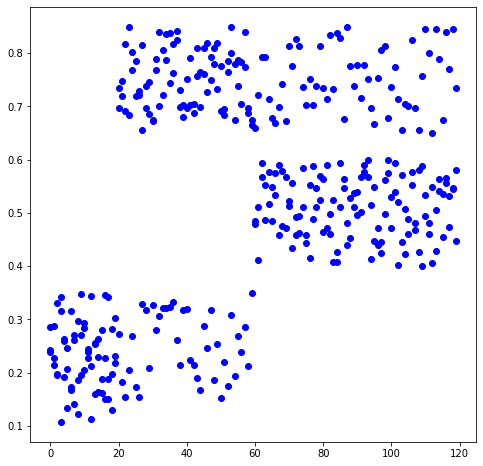

In [81]:
#Visualização dos dados
plt.figure(figsize=(8, 8))
plt.plot(valoresEntrada, 'bo')

In [ ]:
raw_data=data
# raw_data

In [83]:
n_iter=2000 #NÚMERO DE ITERAÇÕES
init_learning_rate=0.01 #TAXA DE APRENDIZADO
m=raw_data.shape[0] #TAMANHO LARGURA
n=raw_data.shape[1] # TAMANHO ALTURA

In [108]:
TAM_MAPA=np.array([4,4]) #TAMANHO DO MAPA - 16 NEURÔNIOS
net=np.random.random((TAM_MAPA[0],TAM_MAPA[1],n)) #REDE KOHONEN PESOS
RAIO=max(TAM_MAPA[0],TAM_MAPA[1])/2 #RAIO INICIAL
TEMPO=n_iter/np.log(RAIO) #TEMPO DE DECAIMENTO LR

In [ ]:
# raw_data/raw_data.max(axis=0)

In [86]:
#FUNÇÃO PARA NORMALIZAR OS DADOS USANDO O MAIOR VALOR DOS DADOS
def normalize_data(raw_data, modo):
    if modo=='coluna':
        col_max=raw_data.max(axis=0)
        data=raw_data/col_max
        return data
    else:
        data=raw_data/data.max()
        return data

In [ ]:
data=normalize_data(raw_data, modo='coluna')#NORMALIZA DADOS USANDO FUNÇÃO ACIMA
# print(data)

In [88]:
def DECAIMENTO_RAIO(RAIO,i,TEMPO): #DECAIMENTO DO RAIO CONFORME ITERAÇÕES
    return RAIO*np.exp(-i/TEMPO)
def DECAIMENTO_LR(init_learning_rate,i,n_iter): # DECAIMENTO TAXA DE APRENDIZADO
    return init_learning_rate* np.exp(-i/n_iter)
def FUN_H(distance,RAIO): # DECAIMENTO INFLUENCIA DA VIZINHANÇA - h(X)
    return np.exp(-distance/(2*(RAIO**2)))

In [89]:
def eucl_dist(x,y): #CALCULO DA DISTANCIA EUCLIDIANA
    return np.sqrt(np.sum((x-y)**2))
def WINNER(t,net):
    min_dist=1000000 #SETA MINIMA DISTÂNCIA PARA VALOR ALTO/INFINITO
    for x in range(net.shape[0]): #PERCORRE LINHA NEURONIOS
        for y in range(net.shape[1]): #PERCORRE COLUNA NEURONIOS
            unit=net[x,y].reshape(1,-1) #MODIFICA FORMATO PARA 1 COLUNA
            t=t.reshape(1,-1) #MODIFICA FORMATO PARA 1 COLUNA
            euc_dist=eucl_dist(unit,t) #CALCULA DISTANCIA
            if euc_dist < min_dist: #ACHA MINIMA DISTANCIA ENTRE DADO E NEURONIOS
                min_dist=euc_dist #PARA COMPARAR
                POS_WIN=net[x,y] 
                INDICE_idx=np.array([x,y])
    return (POS_WIN,INDICE)            #RESULTADO RETORNADO

In [90]:
for i in range(n_iter):
 t=data[np.random.randint(0,m),:] #SELECIONA UM VALOR PARA TREINO RANDOMICO
 r=DECAIMENTO_RAIO(RAIO,i,TEMPO) # DIMINUI RAIO DA VIZINHANÇA
 l=DECAIMENTO_LR(init_learning_rate,i,n_iter) #DIMINUI LEARNING RATE
 _,INDICE=WINNER(t,net) #DETERMINA NEURONIO VENCEDOR
 for x in range(net.shape[0]): #LOOP LINHA
    for y in range(net.shape[1]):#LOOP COLUNA
        w=net[x,y].reshape(1,n) #MODIFICA FORMATO PARA UMA LINHA
        w_dist=eucl_dist(np.array([[x,y]]),INDICE.reshape(1,2)) #CALCULA DISTANCIA DE W
        if w_dist<=r: #ATUALIZA PARAMETROS SE NECESSARIO
            influence=FUN_H(w_dist,r) #INFLUENCIA VIZ.
            new_w=w+(l*influence*(t.reshape(1,-1)-w)) # PESOS
            net[x,y]=new_w.reshape(1,3) #REDE W

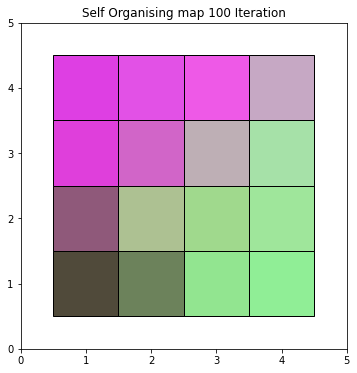

In [91]:
#VISUALIZAÇÃO
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111,aspect="equal")
ax.set_xlim((0,net.shape[0]+1))
ax.set_ylim((0,net.shape[1]+1))
ax.set_title("MAPA AUTO ORGANIZAVEL")
for x in range(1,net.shape[0]+1):
    for y in range(1,net.shape[1]+1):
        ax.add_patch(patches.Rectangle((x-0.5,y-0.5),1,1,facecolor=net[x-1,y-1,:],edgecolor="black"))
plt.show()

In [97]:
teste=pd.read_csv("test.csv", header=None)
teste=np.array(teste)

In [100]:
dados

,x1,x2,x3,TIPO
0,0.2417,0.2857,0.2397,A
1,0.2268,0.2874,0.2153,A
2,0.1975,0.3315,0.1965,A
3,0.3414,0.3166,0.1074,A
4,0.2587,0.1918,0.2634,A
...,...,...,...,...
115,0.5349,0.6736,0.4541,C
116,0.5569,0.8393,0.5652,C
117,0.4729,0.7702,0.5325,C
118,0.5472,0.8454,0.5449,C


# Python começa contar do zero

In [107]:
#DADOS DE TREINO PARA SABER INFLUÊNCIA DOS NEURÔNIOS
map_treino = np.array(dados)
for i in range(len(map_treino)):
  exemplo=map_treino[i,:3]
  _, resultado = WINNER(exemplo,net)

  print(" Amostra " + str(i) + " Neuronio " + str(resultado) + " Classe " + str(map_treino[i,3]))


 Amostra 0 Neuronio [0 0] Classe A
 Amostra 1 Neuronio [0 0] Classe A
 Amostra 2 Neuronio [0 0] Classe A
 Amostra 3 Neuronio [0 0] Classe A
 Amostra 4 Neuronio [0 0] Classe A
 Amostra 5 Neuronio [0 0] Classe A
 Amostra 6 Neuronio [0 0] Classe A
 Amostra 7 Neuronio [0 0] Classe A
 Amostra 8 Neuronio [0 0] Classe A
 Amostra 9 Neuronio [0 0] Classe A
 Amostra 10 Neuronio [0 0] Classe A
 Amostra 11 Neuronio [0 0] Classe A
 Amostra 12 Neuronio [0 0] Classe A
 Amostra 13 Neuronio [0 0] Classe A
 Amostra 14 Neuronio [0 0] Classe A
 Amostra 15 Neuronio [0 0] Classe A
 Amostra 16 Neuronio [0 0] Classe A
 Amostra 17 Neuronio [0 0] Classe A
 Amostra 18 Neuronio [0 0] Classe A
 Amostra 19 Neuronio [0 0] Classe B
 Amostra 20 Neuronio [1 2] Classe B
 Amostra 21 Neuronio [0 2] Classe B
 Amostra 22 Neuronio [0 2] Classe B
 Amostra 23 Neuronio [0 2] Classe B
 Amostra 24 Neuronio [0 2] Classe B
 Amostra 25 Neuronio [0 2] Classe B
 Amostra 26 Neuronio [0 2] Classe B
 Amostra 27 Neuronio [1 2] Classe B
 A

In [99]:
#TESTE DOS RESULTADOS
for i in range(len(teste)):
  exemplo=teste[i,:]
  _, resultado = WINNER(exemplo,net)

  print(resultado)

[0 0]
[0 2]
[1 1]
[0 0]
[0 2]
[2 0]
[0 0]
[0 2]
[1 1]
[0 0]
[1 2]
[2 1]



# Número do neurônio



---



*   **[0,0]** = (01)   |   **[0,1]** = (02)  |    **[0,2]** = (03)  |    **[0,3]** = (04) 
*   **[1,0]** = (05)   |   **[1,1]** = (06)  |    **[1,2]** = (07)  |    **[1,3]** = (08) 
*   **[2,0]** = (09)   |   **[2,1]** = (10)  |    **[2,2]** = (11)  |    **[2,3]** = (12) 
*   **[3,0]** = (13)   |   **[3,1]** = (14)  |    **[3,2]** = (15)  |    **[3,3]** = (16) 


---




1. 0.2471 0.1778 0.2905 CLASSE A Neuronio 1
2. 0.8240 0.2223 0.7041 CLASSE B Neuronio 3
0.4960 0.7231 0.5866 CLASSE C  Neuronio 6
0.2923 0.2041 0.2234 CLASSE A Neuronio 1
0.8118 0.2668 0.7484 CLASSE B Neuronio 3
0.4837 0.8200 0.4792 CLASSE C Neuronio 9
0.3248 0.2629 0.2375 CLASSE A Neuronio 1
0.7209 0.2116 0.7821 CLASSE B Neuronio 3
0.5259 0.6522 0.5957 CLASSE C Neuronio 6
0.2075 0.1669 0.1745 CLASSE A Neuronio 1
0.7830 0.3171 0.7888 CLASSE B Neuronio 7
0.5393 0.7510 0.5682 CLASSE C Neuronio 10